<a href="https://colab.research.google.com/github/AnguillaJaponica/decision_analyzer/blob/master/chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import pandas as pd
# DataFrameの全角文字の出力をきれいにする。
pd.set_option('display.unicode.east_asian_width', True)
# 本文の数値と合わせるために、小数点以下3桁で丸める
pd.set_option('display.precision', 3)

In [ ]:
def self_info(prob):
  return(-1 * np.log2(prob))

In [ ]:
i_6 = self_info(1/6)
print(f'6の目が出たとわかった時の自己情報量: {i_6:.3g}')

6の目が出たとわかった時の自己情報量: 2.58


In [ ]:
i_3mul = self_info(1/3)
i_even = self_info(1/2)
print(f'3の倍数とわかった時の自己情報量: {i_3mul:.3g}')
print(f'偶数とわかった時の自己情報量: {i_even:.3g}')
print(f'情報を小出しにされた時の合計値: {i_3mul + i_even:.3g}')

3の倍数とわかった時の自己情報量: 1.58
偶数とわかった時の自己情報量: 1
情報を小出しにされた時の合計値: 2.58


In [9]:
# 平均情報量と情報エントロピー

# 好況と不況の確率
prob_state = pd.Series([0.4, 0.6])
prob_state.index = ['好況', '不況']
prob_state

好況    0.4
不況    0.6
dtype: float64

In [14]:
H = prob_state[0] * self_info(prob_state[0]) + prob_state[1] * self_info(prob_state[1])
print(f'{H:.3g}')

0.971


In [13]:
# scipyを使ったエントロピーの計算
# インポート
from scipy.stats import entropy

In [15]:
H_stats = entropy(prob_state, base=2)
print(f'{H_stats:.3g}')

0.971


In [16]:
# 確率の和が1になっていないと勝手に標準化される
H_stats = entropy(pd.Series([0.2, 0.3]), base=2)
print(f'{H_stats:.3g}')

0.971


In [18]:
 # 11種類の確率分布を作る
prob_df = pd.DataFrame({
    'p1': np.arange(start=0, stop=1.1, step=0.1),
    'p2': 1 - np.arange(start=0, stop=1.1, step=0.1)
})

print(prob_df)

     p1   p2
0   0.0  1.0
1   0.1  0.9
2   0.2  0.8
3   0.3  0.7
4   0.4  0.6
5   0.5  0.5
6   0.6  0.4
7   0.7  0.3
8   0.8  0.2
9   0.9  0.1
10  1.0  0.0


In [19]:
# エントロピーの列を作る
prob_df['entropy'] = prob_df [['p1', 'p2']].apply(entropy, axis=1, base=2)


In [20]:
print(prob_df)

     p1   p2  entropy
0   0.0  1.0    0.000
1   0.1  0.9    0.469
2   0.2  0.8    0.722
3   0.3  0.7    0.881
4   0.4  0.6    0.971
5   0.5  0.5    1.000
6   0.6  0.4    0.971
7   0.7  0.3    0.881
8   0.8  0.2    0.722
9   0.9  0.1    0.469
10  1.0  0.0    0.000


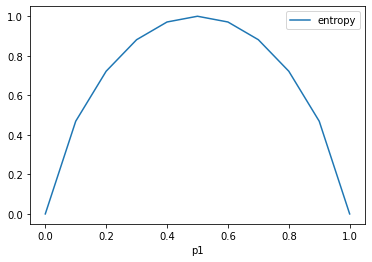

In [21]:
prob_df.plot(x='p1', y='entropy')

In [22]:
joint_forecast_state = pd.DataFrame({
    '好況予測': [0.35, 0.1],
    '不況予測': [0.05, 0.5]
})
joint_forecast_state.index = ['好況', '不況']
print(joint_forecast_state)

      好況予測  不況予測
好況      0.35      0.05
不況      0.10      0.50


In [24]:
marginal_forecast = joint_forecast_state.sum(axis=0)
marginal_forecast

好況予測    0.45
不況予測    0.55
dtype: float64

In [26]:
marginal_state = joint_forecast_state.sum(axis=1)
marginal_state

好況    0.4
不況    0.6
dtype: float64

In [28]:
# 予測が与えられた後の条件付き分布
conditional_forecast = joint_forecast_state.div(marginal_forecast, axis=1)
print(conditional_forecast)

      好況予測  不況予測
好況     0.778     0.091
不況     0.222     0.909


In [30]:
# 予測結果ごとの不確実性
H_by_f = conditional_forecast.apply(entropy, axis=0, base=2)
H_by_f

好況予測    0.764
不況予測    0.439
dtype: float64

In [32]:
H_conditional = H_by_f.mul(marginal_forecast).sum()
print(f'{H_conditional:.3g}')

0.586
